In [161]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fetch data

In [162]:
a=pd.read_csv('C:/Users/Lenovo/Downloads/BBC_News.csv')
a.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [163]:
a = a.drop(labels=['ArticleId'],axis=1)
a.shape

(1490, 2)

In [164]:
a.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

# EDA

Text(0.5, 1.0, 'Category')

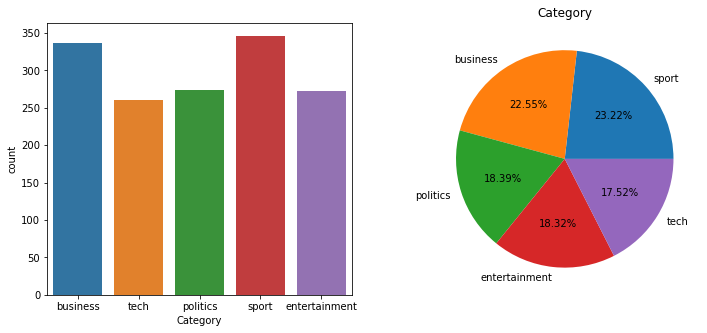

In [165]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(a['Category'])
plt.subplot(1,2,2)
plt.pie(a['Category'].value_counts(), labels = a['Category'].value_counts().index, autopct='%.02f%%')
plt.title('Category')

In [168]:
a[['Category_id']] = a[['Category']].replace({'business':0, 'tech':1, 'politics':2, 'sport':3,'entertainment':4})

In [169]:
a.head()

,Text,Category,Category_id
0,worldcom ex-boss launches defence lawyers defe...,business,0
1,german business confidence slides german busin...,business,0
2,bbc poll indicates economic gloom citizens in ...,business,0
3,lifestyle governs mobile choice faster bett...,tech,1
4,enron bosses in $168m payout eighteen former e...,business,0


# Preprocessing

In [69]:
import re
from nltk.stem import PorterStemmer
from nltk .stem import WordNetLemmatizer

In [70]:
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [71]:
text = []
for i in a.Text:
    q1 = re.sub("[^a-zA-Z0-9 ]","",i)
    q2 = q1.upper()
    q3 = q2.split(" ")
    q4 = ""
    for j in q3:
        q4 = q4 + " " + str(wnl.lemmatize(ps.stem(j))).upper()
    text.append(q4)

In [72]:
text

[' WORLDCOM EXBOSS LAUNCH DEFENC LAWYER DEFEND FORMER WORLDCOM CHIEF BERNI EBBER AGAINST A BATTERI OF FRAUD CHARG HAVE CALL A COMPANI WHISTLEBLOW A THEIR FIRST WIT  CYNTHIA COOPER  WORLDCOM S EXHEAD OF INTERN ACCOUNT  ALERT DIRECTOR TO IRREGULAR ACCOUNT PRACTIC AT THE U TELECOM GIANT IN 2002 HER WARN LED TO THE COLLAPS OF THE FIRM FOLLOW THE DISCOVERI OF AN 11BN 57BN ACCOUNT FRAUD MR EBBER HA PLEAD NOT GUILTI TO CHARG OF FRAUD AND CONSPIRACI  PROSECUT LAWYER HAVE ARGU THAT MR EBBER ORCHESTR A SERI OF ACCOUNT TRICK AT WORLDCOM  ORDER EMPLOYE TO HIDE EXPENS AND INFLAT REVENU TO MEET WALL STREET EARN ESTIM BUT M COOPER  WHO NOW RUN HER OWN CONSULT BUSI  TOLD A JURI IN NEW YORK ON WEDNESDAY THAT EXTERN AUDITOR ARTHUR ANDERSEN HAD APPROV WORLDCOM S ACCOUNT IN EARLI 2001 AND 2002 SHE SAID ANDERSEN HAD GIVEN A  GREEN LIGHT  TO THE PROCEDUR AND PRACTIC USE BY WORLDCOM MR EBBER S LAWYER HAVE SAID HE WA UNAWAR OF THE FRAUD  ARGU THAT AUDITOR DID NOT ALERT HIM TO ANI PROBLEM  M COOPER ALSO SAID T

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(text).toarray()

In [141]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [190]:
x.shape

(1490, 19765)

In [191]:
y = a[['Category_id']]
y

,Category_id
0,0
1,0
2,0
3,1
4,0
...,...
1485,4
1486,4
1487,0
1488,1


# train_test_split

In [143]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=25)

# ML models

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [145]:
def model(model_obj):
    model = model_obj.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    tr_acc = accuracy_score(ytrain,pred_tr)
    pred_ts = model.predict(xtest)
    ts_acc = accuracy_score(ytest,pred_ts)
    return round(tr_acc,3),round(ts_acc,3),model_obj


In [ ]:
# DecisionTreeClassifier with max_depth

In [148]:
p = []
for i in range(2,50,1):
    dtc = DecisionTreeClassifier(random_state=25, max_depth=i)
    p.append(model(dtc))
    
p    

[(0.416, 0.383, DecisionTreeClassifier(max_depth=2, random_state=25)),
 (0.568, 0.53, DecisionTreeClassifier(max_depth=3, random_state=25)),
 (0.681, 0.638, DecisionTreeClassifier(max_depth=4, random_state=25)),
 (0.766, 0.661, DecisionTreeClassifier(max_depth=5, random_state=25)),
 (0.811, 0.674, DecisionTreeClassifier(max_depth=6, random_state=25)),
 (0.86, 0.715, DecisionTreeClassifier(max_depth=7, random_state=25)),
 (0.882, 0.721, DecisionTreeClassifier(max_depth=8, random_state=25)),
 (0.897, 0.705, DecisionTreeClassifier(max_depth=9, random_state=25)),
 (0.925, 0.725, DecisionTreeClassifier(max_depth=10, random_state=25)),
 (0.937, 0.721, DecisionTreeClassifier(max_depth=11, random_state=25)),
 (0.95, 0.732, DecisionTreeClassifier(max_depth=12, random_state=25)),
 (0.959, 0.742, DecisionTreeClassifier(max_depth=13, random_state=25)),
 (0.967, 0.732, DecisionTreeClassifier(max_depth=14, random_state=25)),
 (0.978, 0.732, DecisionTreeClassifier(max_depth=15, random_state=25)),
 (0

In [ ]:
# DecisionTreeClassifier with min_samples_leaf

In [149]:
p = []
for i in range(2,30,1):
    dtc = DecisionTreeClassifier(random_state=25, min_samples_leaf=i)
    p.append(model(dtc))
    
p   

[(0.971, 0.748, DecisionTreeClassifier(min_samples_leaf=2, random_state=25)),
 (0.949, 0.728, DecisionTreeClassifier(min_samples_leaf=3, random_state=25)),
 (0.933, 0.745, DecisionTreeClassifier(min_samples_leaf=4, random_state=25)),
 (0.919, 0.738, DecisionTreeClassifier(min_samples_leaf=5, random_state=25)),
 (0.906, 0.748, DecisionTreeClassifier(min_samples_leaf=6, random_state=25)),
 (0.888, 0.755, DecisionTreeClassifier(min_samples_leaf=7, random_state=25)),
 (0.88, 0.738, DecisionTreeClassifier(min_samples_leaf=8, random_state=25)),
 (0.872, 0.728, DecisionTreeClassifier(min_samples_leaf=9, random_state=25)),
 (0.867, 0.721, DecisionTreeClassifier(min_samples_leaf=10, random_state=25)),
 (0.862, 0.732, DecisionTreeClassifier(min_samples_leaf=11, random_state=25)),
 (0.852, 0.701, DecisionTreeClassifier(min_samples_leaf=12, random_state=25)),
 (0.848, 0.715, DecisionTreeClassifier(min_samples_leaf=13, random_state=25)),
 (0.841, 0.715, DecisionTreeClassifier(min_samples_leaf=14, r

In [ ]:
# RandomForestClassifier 

In [152]:
p = []
for i in range(2,50,1):
    rfc = RandomForestClassifier(random_state=25, n_estimators=i)
    p.append(model(rfc))
    
p   

[(0.876, 0.614, RandomForestClassifier(n_estimators=2, random_state=25)),
 (0.955, 0.715, RandomForestClassifier(n_estimators=3, random_state=25)),
 (0.966, 0.762, RandomForestClassifier(n_estimators=4, random_state=25)),
 (0.984, 0.765, RandomForestClassifier(n_estimators=5, random_state=25)),
 (0.987, 0.779, RandomForestClassifier(n_estimators=6, random_state=25)),
 (0.994, 0.815, RandomForestClassifier(n_estimators=7, random_state=25)),
 (0.995, 0.852, RandomForestClassifier(n_estimators=8, random_state=25)),
 (0.998, 0.856, RandomForestClassifier(n_estimators=9, random_state=25)),
 (0.997, 0.862, RandomForestClassifier(n_estimators=10, random_state=25)),
 (1.0, 0.866, RandomForestClassifier(n_estimators=11, random_state=25)),
 (1.0, 0.883, RandomForestClassifier(n_estimators=12, random_state=25)),
 (0.999, 0.893, RandomForestClassifier(n_estimators=13, random_state=25)),
 (1.0, 0.899, RandomForestClassifier(n_estimators=14, random_state=25)),
 (1.0, 0.903, RandomForestClassifier(n_

In [201]:
rfc = RandomForestClassifier(random_state=25, n_estimators = 48)
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)

In [202]:
round(accuracy_score(ytest, ypred),3)

0.95

# Prediction

In [206]:
x_input = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
pred2 = rfc.predict(x_input)
print(pred2)

[3]


In [ ]:
"""business':0
'tech':1 
'politics':2
'sport':3
'entertainment':4"""